In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3571, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,experion windchants,sector 112,4.75,12623.0,3,5,3+,4.0,Relatively New,3405.0,0,1,0,0,0,0,42
1,flat,ild greens,sector 37c,0.90,5614.0,3,3,3,0.0,Under Construction,1500.0,0,0,0,0,0,1,66
2,flat,signature global synera,sector 81,0.45,7525.0,2,2,2,6.0,Relatively New,664.0,0,0,1,0,0,0,39
3,house,independent,sector 43,9.85,29642.0,5,5,2,3.0,Old Property,3323.0,1,1,0,1,0,1,21
4,flat,sare homes,sector 92,0.80,4695.0,4,4,3,1.0,Moderately Old,1893.0,0,0,0,0,0,1,77


In [6]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [7]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 112,4.75,3,5,3+,4.0,Relatively New,3405.0,0,1,0,0,0,0,42
1,flat,sector 37c,0.90,3,3,3,0.0,Under Construction,1500.0,0,0,0,0,0,1,66
2,flat,sector 81,0.45,2,2,2,6.0,Relatively New,664.0,0,0,1,0,0,0,39
3,house,sector 43,9.85,5,5,2,3.0,Old Property,3323.0,1,1,0,1,0,1,21
4,flat,sector 92,0.80,4,4,3,1.0,Moderately Old,1893.0,0,0,0,0,0,1,77


### luxury score

<Axes: ylabel='luxury_score'>

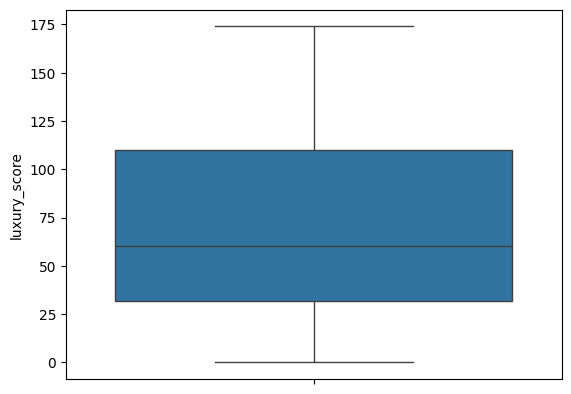

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [11]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 112,4.75,3,5,3+,4.0,Relatively New,3405.0,0,1,0,0,0,0,42,Low
1,flat,sector 37c,0.90,3,3,3,0.0,Under Construction,1500.0,0,0,0,0,0,1,66,Medium
2,flat,sector 81,0.45,2,2,2,6.0,Relatively New,664.0,0,0,1,0,0,0,39,Low
3,house,sector 43,9.85,5,5,2,3.0,Old Property,3323.0,1,1,0,1,0,1,21,Low
4,flat,sector 92,0.80,4,4,3,1.0,Moderately Old,1893.0,0,0,0,0,0,1,77,Medium


### floorNum

<Axes: ylabel='floorNum'>

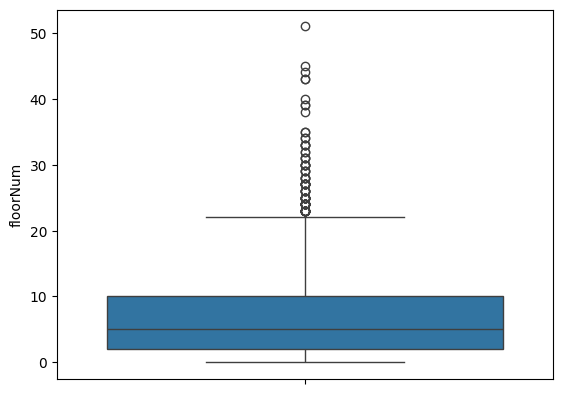

In [13]:
sns.boxplot(df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [15]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 112,4.75,3,5,3+,4.0,Relatively New,3405.0,0,1,0,0,0,0,42,Low,Mid Floor
1,flat,sector 37c,0.90,3,3,3,0.0,Under Construction,1500.0,0,0,0,0,0,1,66,Medium,Low Floor
2,flat,sector 81,0.45,2,2,2,6.0,Relatively New,664.0,0,0,1,0,0,0,39,Low,Mid Floor
3,house,sector 43,9.85,5,5,2,3.0,Old Property,3323.0,1,1,0,1,0,1,21,Low,Mid Floor
4,flat,sector 92,0.80,4,4,3,1.0,Moderately Old,1893.0,0,0,0,0,0,1,77,Medium,Low Floor


In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 112,4.75,3,5,3+,Relatively New,3405.0,0,1,0,0,0,0,Low,Mid Floor
1,flat,sector 37c,0.90,3,3,3,Under Construction,1500.0,0,0,0,0,0,1,Medium,Low Floor
2,flat,sector 81,0.45,2,2,2,Relatively New,664.0,0,0,1,0,0,0,Low,Mid Floor
3,house,sector 43,9.85,5,5,2,Old Property,3323.0,1,1,0,1,0,1,Low,Mid Floor
4,flat,sector 92,0.80,4,4,3,Moderately Old,1893.0,0,0,0,0,0,1,Medium,Low Floor


In [20]:
train_df.drop(columns=['pooja room','study room'],inplace=True)

In [23]:
train_df.drop(columns=['others'],inplace=True)

In [24]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 112,4.75,3,5,3+,Relatively New,3405.0,1,0,0,Low,Mid Floor
1,flat,sector 37c,0.90,3,3,3,Under Construction,1500.0,0,0,1,Medium,Low Floor
2,flat,sector 81,0.45,2,2,2,Relatively New,664.0,0,1,0,Low,Mid Floor
3,house,sector 43,9.85,5,5,2,Old Property,3323.0,1,0,1,Low,Mid Floor
4,flat,sector 92,0.80,4,4,3,Moderately Old,1893.0,0,0,1,Medium,Low Floor


In [25]:
train_df.to_csv('gurgaon_properties_post_feature_selection1.csv', index=False)

In [50]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [51]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,18.0,3,5,4.0,3.0,3405.0,0,1,0,0,0,0,1.0,2.0
1,0.0,45.0,3,3,3.0,4.0,1500.0,0,0,0,0,0,1,2.0,1.0
2,0.0,94.0,2,2,2.0,3.0,664.0,0,0,1,0,0,0,1.0,2.0
3,1.0,52.0,5,5,2.0,2.0,3323.0,1,1,0,1,0,1,1.0,2.0
4,0.0,107.0,4,4,3.0,0.0,1893.0,0,0,0,0,0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,1.0,40.0,4,4,2.0,0.0,1557.0,1,1,0,1,0,0,2.0,1.0
3567,1.0,35.0,4,5,4.0,3.0,2844.0,0,1,1,1,0,0,2.0,2.0
3568,0.0,11.0,3,2,2.0,3.0,750.0,0,0,0,0,0,1,2.0,2.0
3569,0.0,113.0,2,2,2.0,3.0,1275.0,0,0,0,0,0,1,1.0,2.0


In [52]:
y_label

0        4.75
1        0.90
2        0.45
3        9.85
4        0.80
        ...  
3566     3.69
3567    12.00
3568     0.60
3569     0.90
3570    11.00
Name: price, Length: 3571, dtype: float64

##### Trying 7 Feature Selection Techniques and scoring each feature score . all 7 feature score will add up and find average of it. High avg features will give more importance 

### Technique 1 - Correlation Analysis

<Axes: >

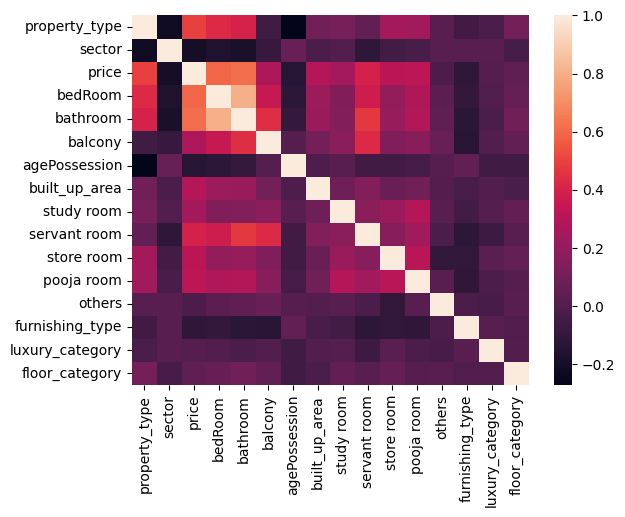

In [54]:
sns.heatmap(data_label_encoded.corr())

In [55]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.199048
1,price,1.000000
2,bedRoom,0.590452
3,bathroom,0.608450
4,balcony,0.271319
5,agePossession,-0.138976
6,built_up_area,0.291542
7,study room,0.241210
8,servant room,0.394148
9,store room,0.309729


### Technique 2 - Random Forest Feature Importance

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.627060
0,property_type,0.118841
1,sector,0.109325
3,bathroom,0.024624
2,bedRoom,0.024041
8,servant room,0.022874
5,agePossession,0.015240
4,balcony,0.012181
12,furnishing_type,0.009535
13,luxury_category,0.007223


### Technique 3 - Gradient Boosting Feature importances

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.663582
1,sector,0.104929
0,property_type,0.101894
2,bedRoom,0.040814
3,bathroom,0.038462
8,servant room,0.030610
9,store room,0.006791
5,agePossession,0.006232
10,pooja room,0.001647
4,balcony,0.001371


### Technique 4 - Permutation Importance

In [58]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.748392
0,property_type,0.178160
1,sector,0.168567
8,servant room,0.015189
5,agePossession,0.009146
14,floor_category,0.003887
12,furnishing_type,0.002411
2,bedRoom,0.001795
7,study room,0.001528
13,luxury_category,0.001451


### Technique 5 - LASSO

In [59]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
0,property_type,0.741355
3,bathroom,0.577340
2,bedRoom,0.467433
8,servant room,0.402832
6,built_up_area,0.377448
9,store room,0.259025
7,study room,0.226188
10,pooja room,0.128651
13,luxury_category,0.074422
4,balcony,0.054103


### Technique 6 - RFE

In [60]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.627440
0,property_type,0.113561
1,sector,0.108257
2,bedRoom,0.028837
8,servant room,0.023862
3,bathroom,0.022844
5,agePossession,0.015411
4,balcony,0.012585
12,furnishing_type,0.010789
9,store room,0.007645


### Technique 7 - Linear Regression Weights

In [63]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
0,property_type,0.747200
3,bathroom,0.575075
2,bedRoom,0.467571
8,servant room,0.405862
6,built_up_area,0.384473
9,store room,0.261549
7,study room,0.232601
10,pooja room,0.131900
13,luxury_category,0.084231
4,balcony,0.061003


In [68]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [69]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.199048,0.109325,0.104929,0.168567,-0.125379,0.108257,-0.132920
bedRoom,0.590452,0.024041,0.040814,0.001795,0.467433,0.028837,0.467571
bathroom,0.608450,0.024624,0.038462,-0.004104,0.577340,0.022844,0.575075
balcony,0.271319,0.012181,0.001371,0.000693,0.054103,0.012585,0.061003
agePossession,-0.138976,0.015240,0.006232,0.009146,-0.015615,0.015411,-0.023001
built_up_area,0.291542,0.627060,0.663582,0.748392,0.377448,0.627440,0.384473
study room,0.241210,0.006968,0.001308,0.001528,0.226188,0.006630,0.232601
servant room,0.394148,0.022874,0.030610,0.015189,0.402832,0.023862,0.405862
store room,0.309729,0.007052,0.006791,-0.000936,0.259025,0.007645,0.261549


In [70]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [72]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.736621
sector             0.135139
bedRoom            0.026787
servant room       0.025739
bathroom           0.023055
agePossession      0.012813
balcony            0.007569
furnishing_type    0.006697
store room         0.005801
study room         0.004613
floor_category     0.004513
luxury_category    0.004510
pooja room         0.003913
others             0.002229
dtype: float64

In [73]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,18.0,3,5,4.0,3.0,3405.0,0,1,0,0,0,0,1.0,2.0
1,0.0,45.0,3,3,3.0,4.0,1500.0,0,0,0,0,0,1,2.0,1.0
2,0.0,94.0,2,2,2.0,3.0,664.0,0,0,1,0,0,0,1.0,2.0
3,1.0,52.0,5,5,2.0,2.0,3323.0,1,1,0,1,0,1,1.0,2.0
4,0.0,107.0,4,4,3.0,0.0,1893.0,0,0,0,0,0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,1.0,40.0,4,4,2.0,0.0,1557.0,1,1,0,1,0,0,2.0,1.0
3567,1.0,35.0,4,5,4.0,3.0,2844.0,0,1,1,1,0,0,2.0,2.0
3568,0.0,11.0,3,2,2.0,3.0,750.0,0,0,0,0,0,1,2.0,2.0
3569,0.0,113.0,2,2,2.0,3.0,1275.0,0,0,0,0,0,1,1.0,2.0


In [74]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [75]:
scores.mean()

np.float64(0.8115337563859406)

### Training again after dropping ["pooja room","study room","others"] to see if ay change

In [78]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [79]:
scores.mean()

np.float64(0.8138098487779809)

In [80]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [81]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [82]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,18.0,3,5,4.0,3.0,3405.0,1,0,0,1.0,2.0,4.75
1,0.0,45.0,3,3,3.0,4.0,1500.0,0,0,1,2.0,1.0,0.90
2,0.0,94.0,2,2,2.0,3.0,664.0,0,1,0,1.0,2.0,0.45
3,1.0,52.0,5,5,2.0,2.0,3323.0,1,0,1,1.0,2.0,9.85
4,0.0,107.0,4,4,3.0,0.0,1893.0,0,0,1,2.0,1.0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,1.0,40.0,4,4,2.0,0.0,1557.0,1,0,0,2.0,1.0,3.69
3567,1.0,35.0,4,5,4.0,3.0,2844.0,1,1,0,2.0,2.0,12.00
3568,0.0,11.0,3,2,2.0,3.0,750.0,0,0,1,2.0,2.0,0.60
3569,0.0,113.0,2,2,2.0,3.0,1275.0,0,0,1,1.0,2.0,0.90
